# Stochastic Gradient Descent

In [71]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import clear_output
from IPython.display import display

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [3]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


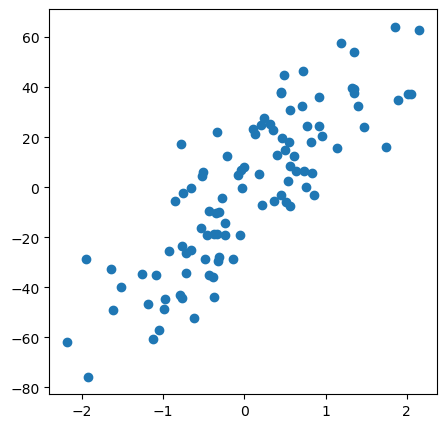

In [4]:
# Plotting the dataset
plt.figure(figsize=(5,5))
plt.scatter(X,y)
plt.show()

In [5]:
m_range = np.linspace(-80,135,100)
loss = []

for i in range(m_range.shape[0]):
    total = 0
    for j in range(X.shape[0]):
        current = (y[j] - m_range[i]*X[j] + 2.29)**2
        total = total + current
    curr_loss = total/X.shape[0]
    loss.append(curr_loss[0])   

In [6]:
def sgd():
    m_arr = []
    loss_arr = []
    lr = 0.1
    epochs = 1
    m = -100
    
    for i in range(epochs):
        for j in range(X.shape[0]):
            
            idx = np.random.randint(X.shape[0], size=1)
            m_der = -2 * (y[idx] - (m * X[idx]) + 2.29) * X[idx]
            m = m - lr*m_der
            m_arr.append(m[0][0])
            # calculate loss for new m
            total = 0
            for j in range(X.shape[0]):
                current = (y[j] - m*X[j] + 2.29)**2
                total = total + current
            loss_arr.append(total[0][0]/X.shape[0])
        
    return m_arr,loss_arr

In [7]:
m_arr,loss_arr = sgd()

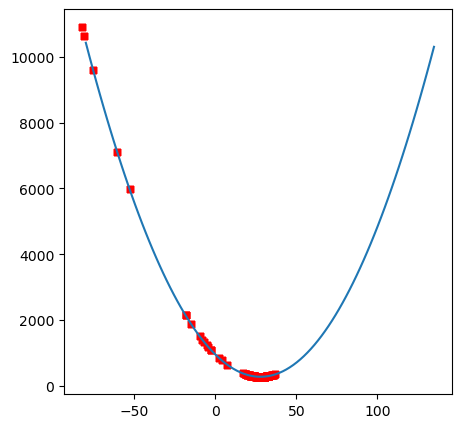

In [8]:
plt.figure(figsize=(5,5))
plt.plot(m_range,loss)
plt.scatter(m_arr,loss_arr,color='red',marker='+',linewidth=5)
plt.show()

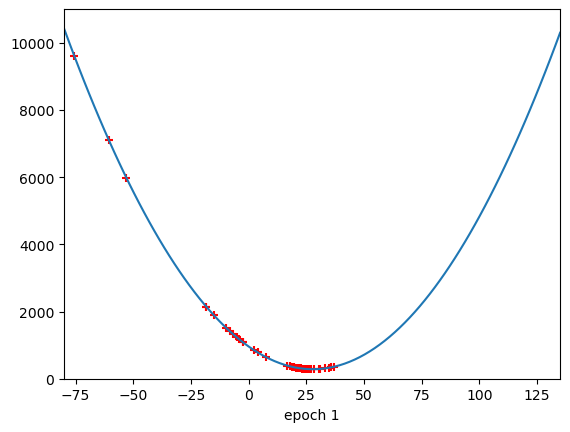

In [9]:
# Animation
from IPython.display import HTML

fig, ax = plt.subplots()
ax.plot(m_range, loss)
x1, y1 = [],[]
sc = ax.scatter(x1,y1,color='red',marker='+')
plt.xlim(-80,135)
plt.ylim(0,11000)

def animate(i):
    label = 'epoch {0}'.format(i + 1)
    x1.append(m_arr[i])
    y1.append(loss_arr[i])
    sc.set_offsets(np.c_[x1,y1])
    ax.set_xlabel(label)

ani = animation.FuncAnimation(fig, animate, frames=50, interval=500) 

f = "SGD.gif"
writergif = matplotlib.animation.PillowWriter(fps=2)
ani.save(f, writer=writergif)

# Display the GIF using HTML
html_str = f'<img src="{f}">'
HTML(html_str)

# Gradient Descent (Batch Gradient Descent)

In [70]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation
from matplotlib.animation import FuncAnimation
from tqdm import tqdm_notebook
from matplotlib.gridspec import GridSpec
plt.rc('animation', html='html5')
from IPython.display import HTML
from IPython.display import clear_output
from IPython.display import display

In [11]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [12]:
X.shape

(100, 1)

In [13]:
y.shape

(100,)

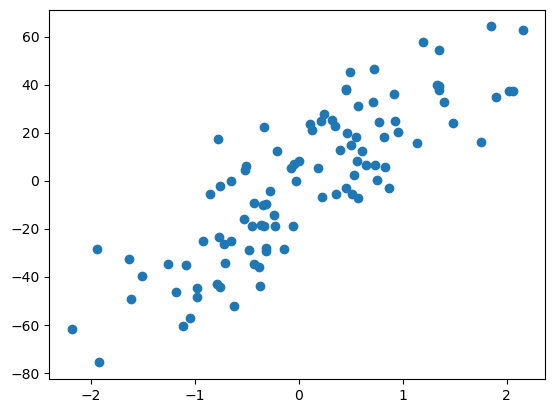

In [14]:
plt.scatter(X,y)
plt.show()

In [15]:
m_range = np.linspace(0,100,100)
b_range = np.linspace(-40,40,100)
xx,yy = np.meshgrid(m_range,b_range)

In [16]:
loss = []

for i in range(xx.ravel().shape[0]):
    total = 0
    for j in range(X.shape[0]):
        current = (y[j] - xx.ravel()[i]*X[j] - yy.ravel()[i])**2
        total = total + current
    curr_loss = total/X.shape[0]
    loss.append(curr_loss[0])

loss = np.array(loss).reshape(100,100)
loss.shape

(100, 100)

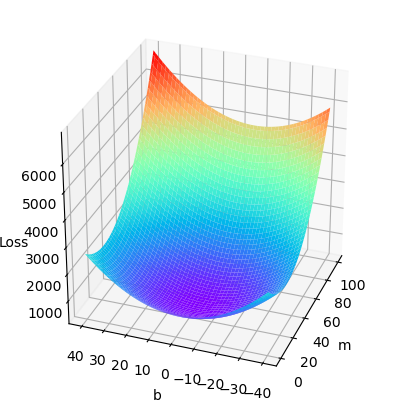

In [17]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, loss, cmap='rainbow', alpha=1)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.view_init(30, 200)

In [18]:
def batch_gd():
    m_arr = []
    b_arr = []
    loss_arr = []
    lr = 0.1
    epochs = 50
    m = 110
    b = 45
    
    for i in range(epochs):
        m_der = (-2/X.shape[0]) * np.sum((y - m*X.ravel() - b)*X.ravel())
        b_der = (-2/X.shape[0]) * np.sum((y - m*X.ravel() - b))
        m = m - lr*m_der
        b = b - lr*b_der
        m_arr.append(m)
        b_arr.append(b)
        # calculate loss for new m
        total = 0
        for j in range(X.shape[0]):
            current = (y[j] - m*X[j] - b)**2
            total = total + current
        loss_arr.append(total[0]/X.shape[0])
        
    return m_arr,b_arr,loss_arr

In [19]:
m_arr,b_arr,loss_arr = batch_gd()

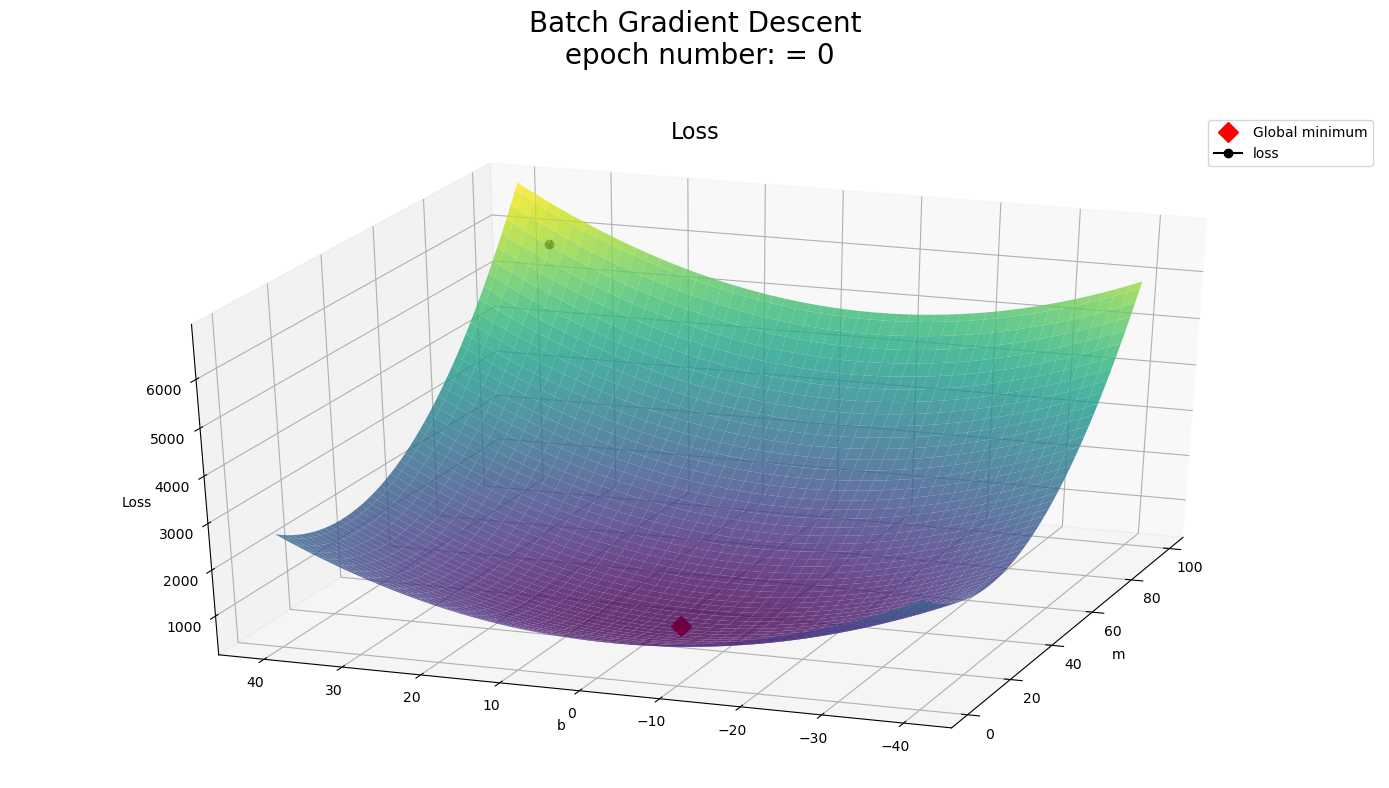

In [59]:
fig = plt.figure(figsize=(14, 8))

ax = fig.add_subplot(projection='3d')
ax.set_title('Loss', fontsize=16, pad=20)
ax.plot_surface(xx, yy, loss, cmap='viridis', alpha=0.8)
ax.plot3D([m_arr[-1]], [b_arr[-1]], [loss_arr[-1]], c='r', marker='D', markersize=10, label='Global minimum', linewidth=0)
line1, = ax.plot3D([],[],[], color='black', marker='o', alpha=1, label='loss')

ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
ax.view_init(30, 200)
ax.legend()

fig.tight_layout()
fig.subplots_adjust(top=0.85)

def animate(i):
    line1.set_data(np.array(m_arr[:i+1]), np.array(b_arr[:i+1]))
    line1.set_3d_properties(loss_arr[:i+1]) 
    epochno = i
    ttl = fig.suptitle(f'Batch Gradient Descent\n epoch number: = {epochno}', fontsize=20)
    return line1, ttl

ani = animation.FuncAnimation(fig, animate, frames=50, interval=500) 

f = "GD.gif"
writergif = matplotlib.animation.PillowWriter(fps=2)
ani.save(f, writer=writergif)

# Display the GIF using HTML
html_str = f'<img src="{f}">'
HTML(html_str)

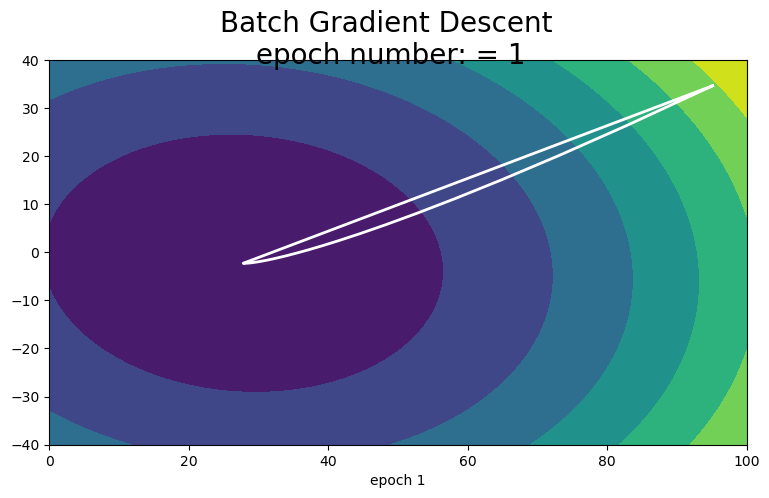

In [58]:
# intercept graph
fig = plt.figure(figsize=(9,5)) 
ax = fig.add_subplot()

line, = ax.plot([], [], lw = 2,color='white') 

ax.contourf(xx, yy, loss)

xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(m_arr[i]) 
    ydata.append(b_arr[i]) 
    line.set_data(xdata, ydata) 
    ax.set_xlabel(label)
    ttl = fig.suptitle(f'Batch Gradient Descent\n epoch number: = {i+1}', fontsize=20)
      
    return line, ttl


ani = animation.FuncAnimation(fig, animate, frames=50, interval=500) 

f = "GD_3D_Contour.gif"
writergif = matplotlib.animation.PillowWriter(fps=2)
ani.save(f, writer=writergif)

# Display the GIF using HTML
html_str = f'<img src="{f}">'
HTML(html_str)

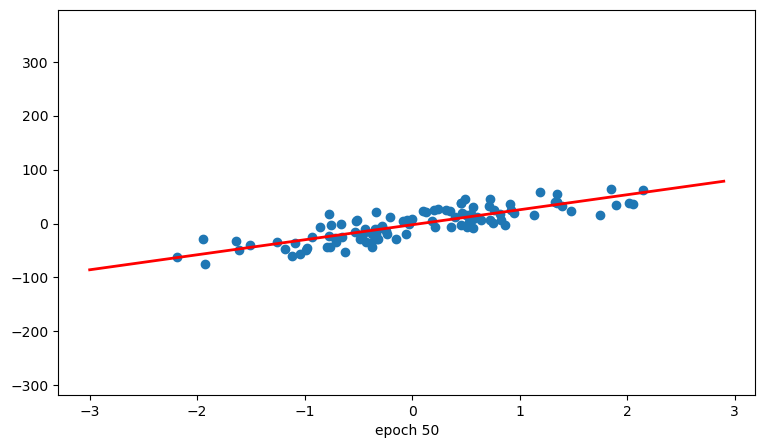

In [33]:
# Intercept graph
fig, ax = plt.subplots(figsize=(9, 5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i * (-27) - 150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i * 110 + 45, 'r-', linewidth=2)

m_arr,b_arr,loss_arr = batch_gd()

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i * m_arr[i] + b_arr[i])
    ax.set_xlabel(label)
    return [line] 

# Initialize the line data
line.set_ydata(x_i * m_arr[0] + b_arr[0])

ani = animation.FuncAnimation(fig, update, frames=50, interval=500, blit=True)

f = "GD_line_plot.gif"
writergif = animation.PillowWriter(fps=2)
ani.save(f, writer=writergif)

# Capture the last frame by getting the last snapshot of the figure
fig.canvas.print_figure('GDLinePlot.png', bbox_inches='tight')

# Display the GIF using HTML
html_str = f'<img src="{f}">'
HTML(html_str)

None


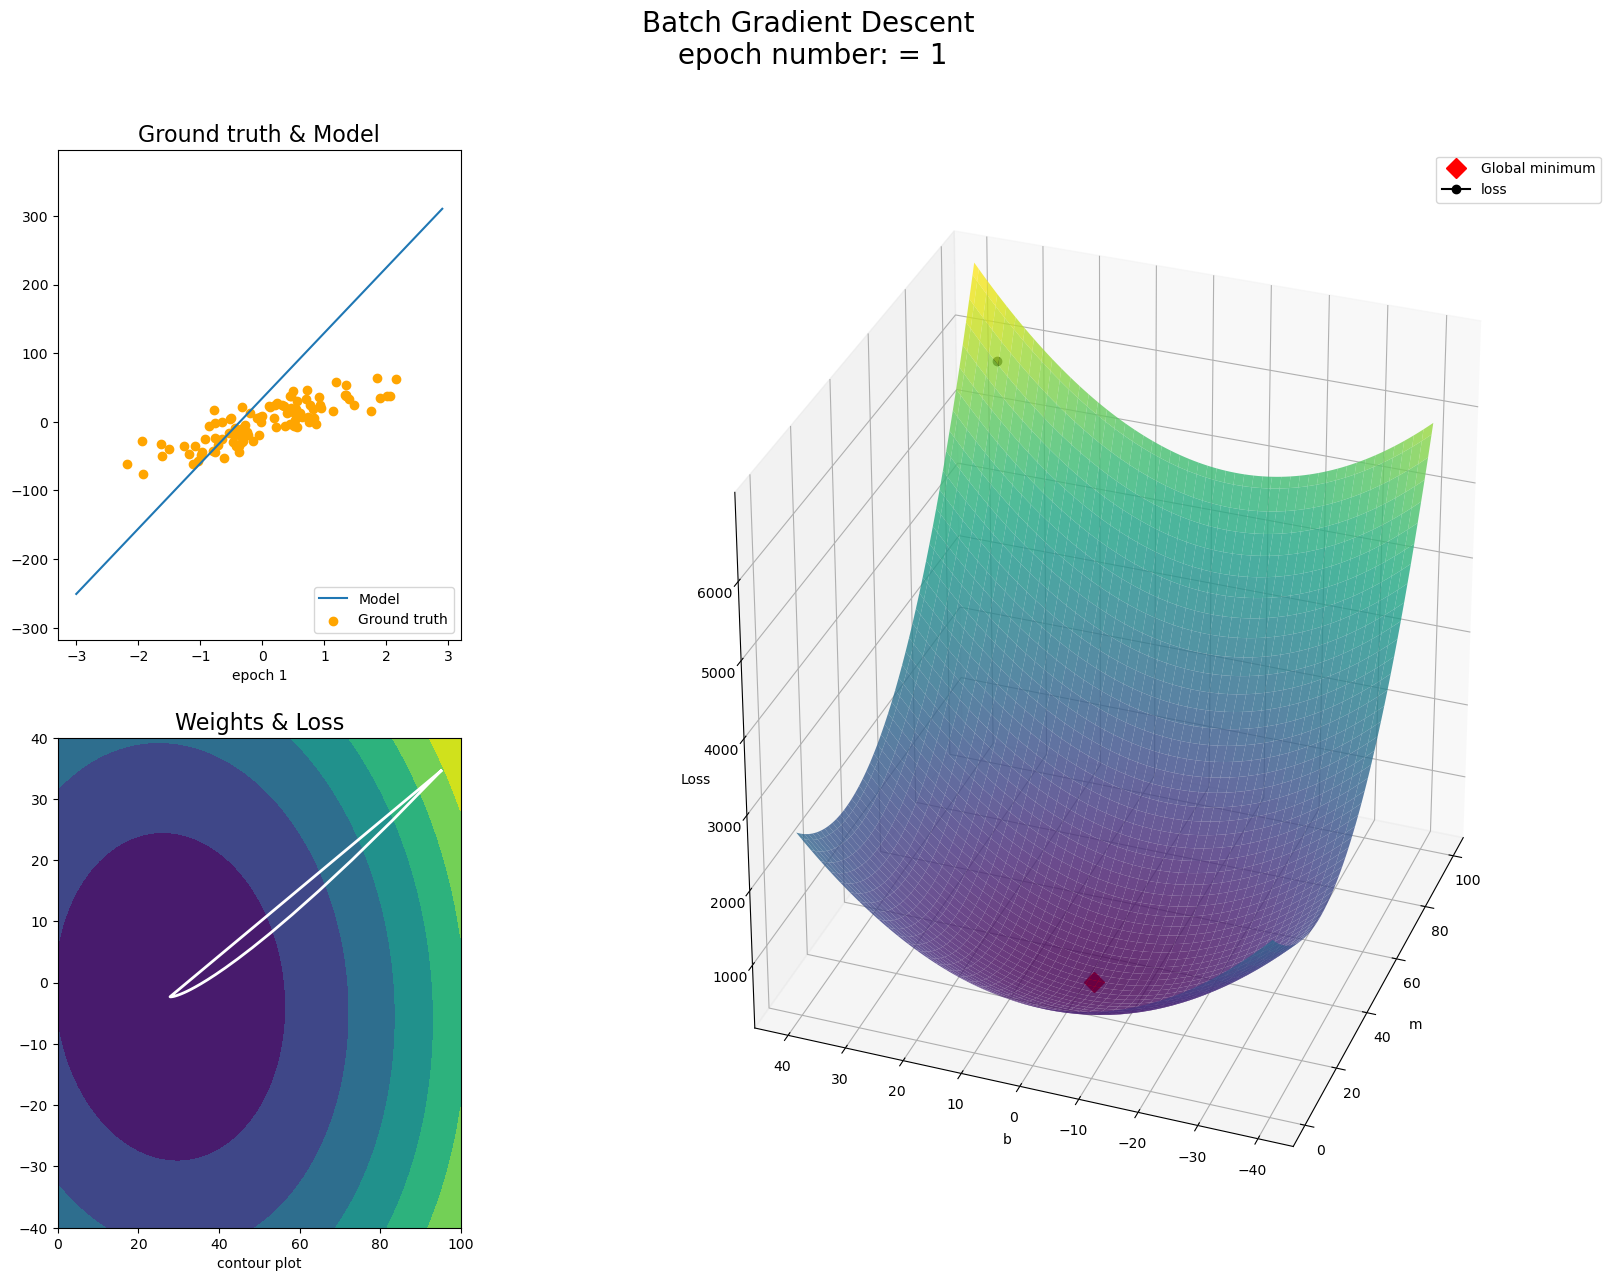

In [77]:
fig = plt.figure(figsize=(20, 14))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

# plot ground truth & model
ax0 = fig.add_subplot(gs[0,0])
ax0.scatter(X, y, c='orange', label='Ground truth')
ax0.set_title('Ground truth & Model', fontsize=16)

x_i = np.arange(-3, 3, 0.1)
line0, = ax0.plot(x_i, x_i*110 + 45, label='Model')

ax0.legend(loc='lower right')

# plot loss
ax1 = fig.add_subplot(gs[:,1],projection='3d')
#ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(xx, yy, loss, cmap='viridis', alpha=0.8)
ax1.plot3D([m_arr[-1]], [b_arr[-1]], [loss_arr[-1]], c='r', marker='D', markersize=10, label='Global minimum', linewidth=0)
line1, = ax1.plot3D([],[],[], color='black', marker='o', alpha=1, label='loss')

ax1.set_xlabel('m')
ax1.set_ylabel('b')
ax1.set_zlabel('Loss')
ax1.view_init(30, 200)
ax1.legend()

# contour plot
ax2 = fig.add_subplot(gs[1,0])
ax2.set_title('Weights & Loss', fontsize=16)
ax2.contourf(xx, yy, loss)

line2, = ax2.plot([], [], lw = 2,color='white') 
  
xdata, ydata = [], []

def animate(i):

    label = 'epoch {0}'.format(i + 1)
    line0.set_ydata(x_i*m_arr[i] + b_arr[i])
    ax0.set_xlabel(label)
    
    line1.set_data(np.array(m_arr[:i+1]), np.array(b_arr[:i+1]))
    line1.set_3d_properties(loss_arr[:i+1]) 
    
    xdata.append(m_arr[i]) 
    ydata.append(b_arr[i]) 
    line2.set_data(xdata, ydata) 
    ax2.set_xlabel('contour plot')
    
    ttl = fig.suptitle(f'Batch Gradient Descent\n epoch number: = {i+1}', fontsize=20)
    
    return line0,line1,line2,ttl

ani = FuncAnimation(fig, animate,frames=50, interval=500)

f = "GD_summary_plot.gif"
writergif = animation.PillowWriter(fps=2)
ani.save(f, writer=writergif)

# Display the GIF using HTML
html_str = f'<img src="{f}">'
print(display(HTML(html_str)))